[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/url/https://colab.research.google.com/drive/1GhEjvC5UHfrQEZ5VS79Wn2rklsXhW4wi?usp=sharing)


# 1.Establishing a connection with Bigquery

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

# 2.Select the data table to be processed (restaurant_data)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "ima-bdao-422710"
dataset_name = "restaurant"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

## 2.1 Filtered restaurants with 4 stars or more and high customer activity

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
# restaurant_df.head()

# Query all the data in the table and store it as a dataframe, sorted by STARS rank from largest to smallest
sorted_df = restaurant_df.sort_values(by='stars', ascending=False)
sorted_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
6995,owMvBvgacX61VhLeMDF7ZQ,Ravello Woodfire Pizza,117 Sharptown Auburn Rd,Woodstown,NJ,08098,39.674535,-75.366967,5.0,9,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1946,S4QB3eNdzdaOkbZQfUfTqQ,Tienda Y Panaderia Guatemalteca,3709 E Washington St,Indianapolis,IN,46201,39.768201,-86.103999,5.0,7,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
37804,DVW9wdWzxzbV1UlUQdfntg,Crepes and Treats,3301 Meramec,Saint Louis,MO,63118,38.580810,-90.241068,5.0,5,...,None,None,False,None,None,<NA>,None,False,<NA>,True
37806,GBD-YjcOD1nG0wv4L0Lvfg,Venus in Furs,18 E Cota St,Santa Barbara,CA,93101,34.418217,-119.696120,5.0,24,...,None,None,False,'no',None,<NA>,"{'monday': False, 'tuesday': False, 'wednesday...",<NA>,True,True
5562,Gmj8oyfKmr0ezXaB2XVuOg,Taquería y Birrieria Arandas,2111 Murfreesboro Pike,Nashville,TN,37217,36.093479,-86.653178,5.0,18,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19479,Pqt6tUHarq5e312EtIgdgA,Wendy's,330 Harding Place,Nashville,TN,37211,36.087184,-86.694887,1.0,7,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
15579,0o6QuA2TgI0AWlWC73NKog,New York Chinese Buffet,8503 W Hillsborough Ave,Tampa,FL,33615,27.997236,-82.579427,1.0,13,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
20086,qaEqiGzQ67ief_yoKP97Hw,McDonald's,29 E Chelten Ave,Philadelphia,PA,19144,40.036678,-75.174299,1.0,16,...,'very_loud',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
5690,Fwk0CuYtBmMZj6yXf_Lwag,Pizza Hut,65 Commerce Cir,Bristol,PA,19007,40.100183,-74.870130,1.0,15,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>


In [ ]:
# Use conditional filtering to find rows with ‘stars’ >= 4 and calculate the quantity.
count_5 = sorted_df[sorted_df['stars'] >= 4].shape[0]

print("stars 4/4.5/5：", count_5)

stars 4/4.5/5： 23358


In [ ]:
# Identify restaurants with high customer activity
sorted_df_review = restaurant_df.sort_values(by='review_count', ascending=False)
sorted_df_review_1 = sorted_df_review.iloc[:23358]
sorted_df_review_1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
45310,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,...,'loud',"{'dessert': False, 'latenight': None, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,False,False
44857,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,...,'average',"{'dessert': None, 'latenight': None, 'lunch': ...",<NA>,None,None,<NA>,None,False,<NA>,True
50460,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
50805,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,False,True
45486,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,False,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,SRb3xScVOeYfhZP4U8LMdA,Paradise Bakery,8540 Castleton Corner Dr,Indianapolis,IN,46250,39.910668,-86.074961,3.0,40,...,'quiet',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
1215,XjST6nGKZ7K_Sb6wKfCPDw,Chocolaterie Bernard Callebaut,10103 - 124th Street,Edmonton,AB,T5N 1P5,53.541792,-113.535351,4.0,40,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
8697,kP5igN3XFPRHvEaunI28tQ,Friends Cafe,319 Friends St,Camden,NJ,08102,39.949233,-75.123776,3.5,40,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True
3902,mprtNLSD_AQ7pTb1vzbSdw,Mezzogiorno,"8000 Essington Ave, Level 2, Terminal B",Philadelphia,PA,19153,39.874034,-75.243804,2.5,40,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False


In [ ]:
sorted_df_1 = sorted_df.iloc[:23358]

# Selection of restaurants with 4 stars or more and high activity levels
filtered_df = sorted_df_1[sorted_df_1['name'].isin(sorted_df_review_1['name'])]
filtered_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
49909,uTEvgnFfZk6s-apf1j5Dnw,Bugambilias Mexican Cuisine,5763 E 86th St,Indianapolis,IN,46250,39.911794,-86.069435,5.0,147,...,'average',"{'breakfast': None, 'brunch': None, 'lunch': N...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
49915,NbTNxhZXhPOPUhBFXZ1jLQ,The Blacktop Grill,"8300 N Thornydale Rd, Ste 120",Tucson,AZ,85741,32.357595,-111.046310,5.0,99,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",False,'no',None,<NA>,None,<NA>,<NA>,True
9234,S5LnH1njwFBlq77tIkjI1g,Yolk White & Associates,100 N Ashley Dr,Tampa,FL,33602,27.945465,-82.458814,5.0,229,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
9233,ckUXjKaqb60XOMTB-EUwbQ,Dolce Enigma,14351 N Dale Mabry Hwy,Tampa,FL,33618,28.078100,-82.506422,5.0,118,...,'average',"{'dessert': True, 'latenight': False, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
9224,GJtRRcx44M9ptMUYxccUeg,Little Mosko's,41 Peabody St,Nashville,TN,37210,36.157736,-86.768524,5.0,107,...,'quiet',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,B6Lvq3sOYwhKxPzadDka9g,Zeppoli,618 Collings Ave,Collingswood,NJ,08107,39.910747,-75.084453,4.0,297,...,'very_loud',"{'breakfast': False, 'brunch': False, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
1407,ut5_QuPZ0Tg320BoXsN9_A,Costa Vida Fresh Mexican Grill,1666 S Entertainment Ave,Boise,ID,83709,43.589240,-116.280379,4.0,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
9615,fsFZQ2ZbTutgUlnWPhTU6A,J's Seafood Dock,"1100 N Peters St, Ste 25",New Orleans,LA,70116,29.960226,-90.059097,4.0,333,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
9536,ZabkbBzscq6GJNtsYZZwrg,Amici Restaurant,312 Kresson Rd,Cherry Hill,NJ,08034,39.892855,-75.014953,4.0,100,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True


## 2.2 Cleaning up the category of filtered restaurants

In [ ]:
# Remove useless category columns
cleaned_df = filtered_df.copy()

# Iterating through the columns of a DataFrame
for col in filtered_df.columns:
    # If the column name starts with ‘category_’
    if col.startswith("category_"):
        # Calculate the sum of the column
        col_sum = filtered_df[col].sum()
        # If the sum is 0, the column is deleted
        if col_sum == 0:
            cleaned_df.drop(columns=[col], inplace=True)

cleaned_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
49909,uTEvgnFfZk6s-apf1j5Dnw,Bugambilias Mexican Cuisine,5763 E 86th St,Indianapolis,IN,46250,39.911794,-86.069435,5.0,147,...,'average',"{'breakfast': None, 'brunch': None, 'lunch': N...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
49915,NbTNxhZXhPOPUhBFXZ1jLQ,The Blacktop Grill,"8300 N Thornydale Rd, Ste 120",Tucson,AZ,85741,32.357595,-111.046310,5.0,99,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",False,'no',None,<NA>,None,<NA>,<NA>,True
9234,S5LnH1njwFBlq77tIkjI1g,Yolk White & Associates,100 N Ashley Dr,Tampa,FL,33602,27.945465,-82.458814,5.0,229,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
9233,ckUXjKaqb60XOMTB-EUwbQ,Dolce Enigma,14351 N Dale Mabry Hwy,Tampa,FL,33618,28.078100,-82.506422,5.0,118,...,'average',"{'dessert': True, 'latenight': False, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
9224,GJtRRcx44M9ptMUYxccUeg,Little Mosko's,41 Peabody St,Nashville,TN,37210,36.157736,-86.768524,5.0,107,...,'quiet',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,B6Lvq3sOYwhKxPzadDka9g,Zeppoli,618 Collings Ave,Collingswood,NJ,08107,39.910747,-75.084453,4.0,297,...,'very_loud',"{'breakfast': False, 'brunch': False, 'lunch':...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
1407,ut5_QuPZ0Tg320BoXsN9_A,Costa Vida Fresh Mexican Grill,1666 S Entertainment Ave,Boise,ID,83709,43.589240,-116.280379,4.0,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
9615,fsFZQ2ZbTutgUlnWPhTU6A,J's Seafood Dock,"1100 N Peters St, Ste 25",New Orleans,LA,70116,29.960226,-90.059097,4.0,333,...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
9536,ZabkbBzscq6GJNtsYZZwrg,Amici Restaurant,312 Kresson Rd,Cherry Hill,NJ,08034,39.892855,-75.014953,4.0,100,...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",False,None,None,<NA>,None,<NA>,<NA>,True


## 2.3 Cleaning up the attributes





In [ ]:
# Observe the null value of attribute

import pandas as pd

# Counting the number of nulls in the last 33 columns
null_counts = cleaned_df.iloc[:, -33:].isna().sum()

print(null_counts)

最后40列的空值个数：
RestaurantsDelivery            1672
OutdoorSeating                 1994
BusinessAcceptsCreditCards      855
BusinessParking                 543
BikeParking                    2029
RestaurantsPriceRange2         1154
RestaurantsTakeOut              809
ByAppointmentOnly             12098
WiFi                           1560
Alcohol                        1517
Caters                         2216
RestaurantsAttire              2753
RestaurantsReservations        1529
Ambience                       1230
GoodForKids                    2249
CoatCheck                     12106
DogsAllowed                    7641
RestaurantsTableService        5300
RestaurantsGoodForGroups       1939
WheelchairAccessible           7593
HasTV                          1192
HappyHour                      8058
DriveThru                     12532
NoiseLevel                     2431
GoodForMeal                    2927
BusinessAcceptsBitcoin        10588
Smoking                       12266
Music           

In [ ]:
# Delete columns that are too small for null values greater than 10,000
df_delete = cleaned_df.drop(columns=['ByAppointmentOnly', 'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing', 'BestNights', 'BYOB', 'Corkage'])
df_delete


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,GoodForKids,DogsAllowed,RestaurantsTableService,RestaurantsGoodForGroups,WheelchairAccessible,HasTV,HappyHour,NoiseLevel,GoodForMeal,Parking
37858,-bxLBGgtchd-O6-2CdDThA,Coffee N’ Comics,"940 W Moana Ln, Ste 104",Reno,NV,89509,39.490867,-119.806433,5.0,110,...,<NA>,False,False,NaN,True,True,<NA>,'average',None,False
9202,TozkPEh-xhts3qfVeRFeRg,Bad Brother,726 N 24th St,Philadelphia,PA,19130,39.968629,-75.176888,5.0,92,...,True,<NA>,<NA>,NaN,<NA>,True,True,None,None,True
9203,1VnjvQKmWNY9uzJwLAmX1Q,King Siam Thai Cuisine,907 12th Ave S,Nashville,TN,37203,36.146807,-86.786130,5.0,126,...,True,<NA>,True,NaN,<NA>,<NA>,<NA>,None,None,True
3744,FTIOah_Ivhhj5d7tV_eh-g,Calle Mexico,1532-8882 170 Street NW,Edmonton,AB,T5T 4M2,53.522567,-113.622117,5.0,5,...,<NA>,<NA>,False,NaN,<NA>,<NA>,<NA>,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>
37837,g1KoL8rejZ5tTibsyU0x6A,Have A Cow Urban Farm Store and Cafe,2742 Lafayette Ave,St. Louis,MO,63104,38.614968,-90.224859,5.0,66,...,True,True,False,NaN,True,False,<NA>,'average',None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17255,6mCsrUp9Vl4iXMbOxWtVjA,Dosa Hut Indian Grill,4047 Nolensville Pike,Nashville,TN,37211,36.081011,-86.728065,4.0,99,...,True,<NA>,True,True,True,True,<NA>,'average',"{'dessert': False, 'latenight': False, 'lunch'...",True
17616,tGgCNNHVzCPxtKE7PkBjwg,Freddy's Frozen Custard & Steakburgers,1302 Wilmington Pike,West Chester,PA,19382,39.906285,-75.568382,4.0,86,...,True,<NA>,False,True,True,False,<NA>,'average',"{'dessert': True, 'latenight': False, 'lunch':...",True
17238,qqEztk7EZUr6EcpcXKeiJw,Villa Maria Pizza Pasta Panini,768 N Belcher Rd,Clearwater,FL,33765,27.973341,-82.746496,4.0,47,...,True,<NA>,<NA>,True,<NA>,False,<NA>,'average',None,True
17619,UvMbtn9JNpmd6VADusTV3Q,Pressed,"919 St Charles Ave, Ste 116",New Orleans,LA,70130,29.943893,-90.072698,4.0,19,...,True,<NA>,False,False,<NA>,False,<NA>,'average',"{'dessert': False, 'latenight': False, 'lunch'...",True


In [ ]:
null_counts = df_delete.iloc[:, -23:].isna().sum()

# 打印结果
print("最后23列的空值个数：")
print(null_counts)

最后23列的空值个数：
RestaurantsDelivery           1672
OutdoorSeating                1994
BusinessAcceptsCreditCards     855
BusinessParking                543
BikeParking                   2029
RestaurantsPriceRange2        1154
RestaurantsTakeOut             809
WiFi                          1560
Alcohol                       1517
Caters                        2216
RestaurantsAttire             2753
RestaurantsReservations       1529
Ambience                      1230
GoodForKids                   2249
DogsAllowed                   7641
RestaurantsTableService       5300
RestaurantsGoodForGroups      1939
WheelchairAccessible          7593
HasTV                         1192
HappyHour                     8058
NoiseLevel                    2431
GoodForMeal                   2927
Parking                        436
dtype: int64


## 2.4 Upload the new table ***categoryclean*** back to BigQuery

In [ ]:
# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant.categoryclean'
project_id = 'ima-bdao-422710'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
cleaned_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 7958.83it/s]


In [ ]:
import pandas as pd
filename = "output.csv"
cleaned_df.to_csv(filename, index=False)

# 3.Select the data table to be processed (restaurant_tips)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "ima-bdao-422710"
dataset_name = "restaurant"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

df = query_job.to_dataframe()
df

,user_id,business_id,text,date,compliment_count
0,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05+00:00,0
1,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00,0
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Breakfast,2012-10-22 12:54:19+00:00,0
3,Ig2ttf1xX2Ihlm0nsykaTw,QoezRbYQncpRqyrLH6Iqjg,Great service. A Tampa staple.,2016-12-29 17:47:41+00:00,0
4,-Ey8s2o7EmfAHjL8AnOIsQ,QoezRbYQncpRqyrLH6Iqjg,I love this place because you really can't go ...,2015-10-10 12:24:00+00:00,0
...,...,...,...,...,...
1298357,BpQP2G5O2pbJHBcgOaN_EQ,DXlrMS_S1Dkb--eozx8K9g,Hi Yelp Fans I have joined the kitchen at the ...,2013-08-25 05:06:54+00:00,3
1298358,tsMF0FcFcHZ8i28WzWtQXw,N4IFNpTn7kKfK9akJkerwQ,Open for takeout and delivery now ! FYI .... t...,2020-04-18 16:45:07+00:00,4
1298359,ZHU-mgW3hUvjjctbXyRfQw,I_FKWKPVpGts4q_HzJ-0mQ,The Presidential Suite has a bidet. That sold ...,2016-06-03 02:38:42+00:00,4
1298360,tsMF0FcFcHZ8i28WzWtQXw,2VuOLrhe2Iu_FRz1gEIqQA,They are closed at 530 when the sign says 6:00.,2019-07-19 21:30:00+00:00,4


## 3.1 Sentiment categorisation of customer reviews

In [ ]:
# lower casing
target_column = 'text'

In [ ]:
# you might need to do some text cleaning before sentiment analysis. One basic requirement for running the sentiment analysis function, you need to make sure the target column has no null values.
df = df.dropna(subset = [target_column]) # Here I just delete the rows if the target column is null

In [ ]:
from textblob import TextBlob
import numpy as np
df['Polarity'] = df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
df['Subjectivity'] = df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)
df['Sentiment'] = np.where(df['Polarity']>0, 'Positive',np.where(df['Polarity']<0,'Negative', 'Neutral')) # here we set 0 as the benchmark. you can adjust based on your data

In [ ]:
# sort by polarity (low to high)
sorted_df = df.sort_values(by=['Polarity'])

# print top 5 positive and negative
print("Most positive #5 reviews ")
print(sorted_df[target_column].tail())
print("\n") # print line break
print("Most negative #5 reviews ")
print(sorted_df[target_column].head())

Most positive #5 reviews 
684902     Great food and service!!!
227660               Great Beignets!
1049367               Great Wings!!!
1049370     Best Crab Rangoon Around
649180                  Great wings!
Name: text, dtype: object


Most negative #5 reviews 
592046     Do not eat here if you have food allergies the...
751639                                      Horrible service
1222319                                            Boring!!!
202587                                  Get the Bloody Mary!
751864     Merry Christmas from Grant and I at the bloody...
Name: text, dtype: object


<Axes: xlabel='Sentiment', ylabel='count'>

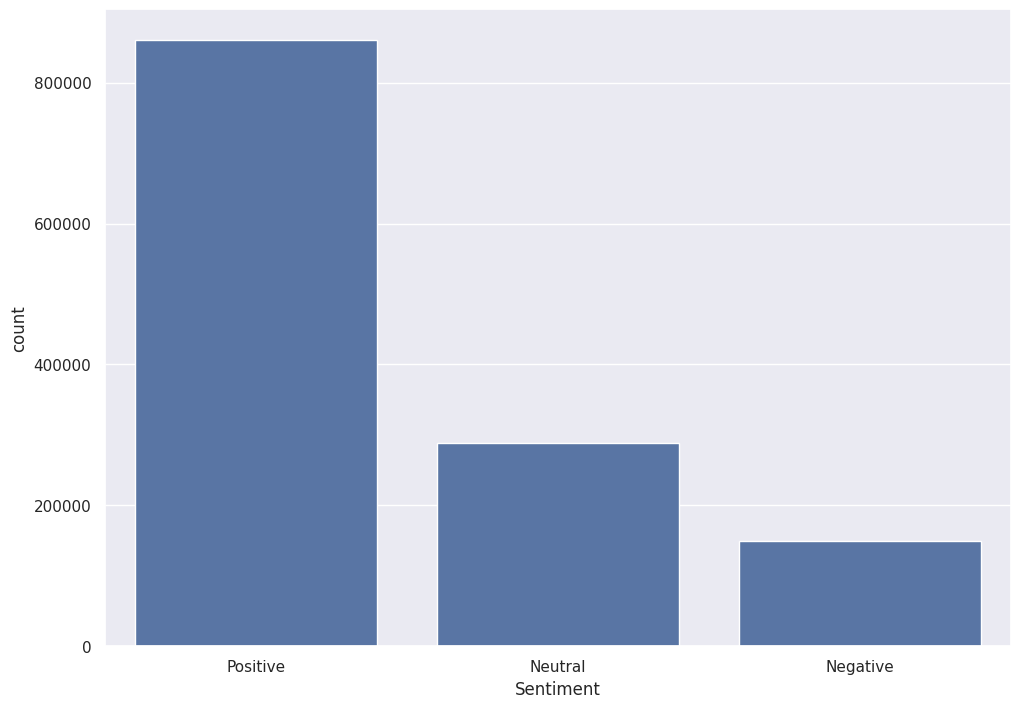

In [ ]:
# Sentiment analysis visualisation
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Sentiment',data = df,order=['Positive','Neutral','Negative'])

## 3.2 Upload the new table ***tipswithsentiment*** back to BigQuery

In [ ]:
# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant.tipswithsentiment'
project_id = 'ima-bdao-422710'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 630.06it/s]


# 4.Select the data table to be processed (tipswithsentiment)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "ima-bdao-422710"
dataset_name = "restaurant"
table_name = "tipswithsentiment" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

## 4.1 Selection of positive reviews for word cloud map analysis

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE Polarity > 0
"""

query_job = bigquery_client.query(query)
results = query_job.result()

df1 = query_job.to_dataframe()
df1

,user_id,business_id,text,date,compliment_count,Polarity,Subjectivity,Sentiment
0,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40+00:00,0,0.337500,0.645833,Positive
1,-Ey8s2o7EmfAHjL8AnOIsQ,QoezRbYQncpRqyrLH6Iqjg,I love this place because you really can't go ...,2015-10-10 12:24:00+00:00,0,0.224206,0.698413,Positive
2,vephhDse0escsj0S-rc__w,_uN0OudeJ3Zl_tf6nxg5ww,"No lunch prices on Saturdays, so that's a bumm...",2012-12-01 21:12:46+00:00,0,0.427083,0.479167,Positive
3,RRYFQo17zogtYBbiUK4l_A,xODBZmX4EmlVvbqtKN7YKg,Halloween special $2 taco on Tuesday and Hallo...,2013-10-20 23:23:56+00:00,0,0.446429,0.571429,Positive
4,JSzIwMqdSI74_ztnbWzsEA,xODBZmX4EmlVvbqtKN7YKg,Steve is awesome and welcoming every single time!,2014-02-14 01:41:07+00:00,0,0.455357,0.607143,Positive
...,...,...,...,...,...,...,...,...
860925,KJ6zy37DaOXVN5l7N7DcEg,K29f9OJYkbxgK5P5ZqUzqA,Truly incredible hotel.,2017-12-28 13:34:26+00:00,0,0.900000,0.900000,Positive
860926,-pVaadyDcECiBHSELskDLg,lh-Mu8wZQW0E_wVsLx90nQ,Incredible,2018-09-15 23:31:29+00:00,0,0.900000,0.900000,Positive
860927,Bj3wAdGZmuHSfHMfVM_xhA,gurR2NBF1RA-l--XLYV17Q,"Incredible espresso, smoothies and food. A ton...",2019-12-04 07:43:31+00:00,0,0.900000,0.900000,Positive
860928,RaePMSaHia7LkP-pZWGQkA,n8ByXuU5_5jbOx5cC9VNZg,Bring a 1qt container and they will sell you i...,2020-11-29 18:48:33+00:00,0,0.900000,0.900000,Positive


In [ ]:
target_column = 'text'

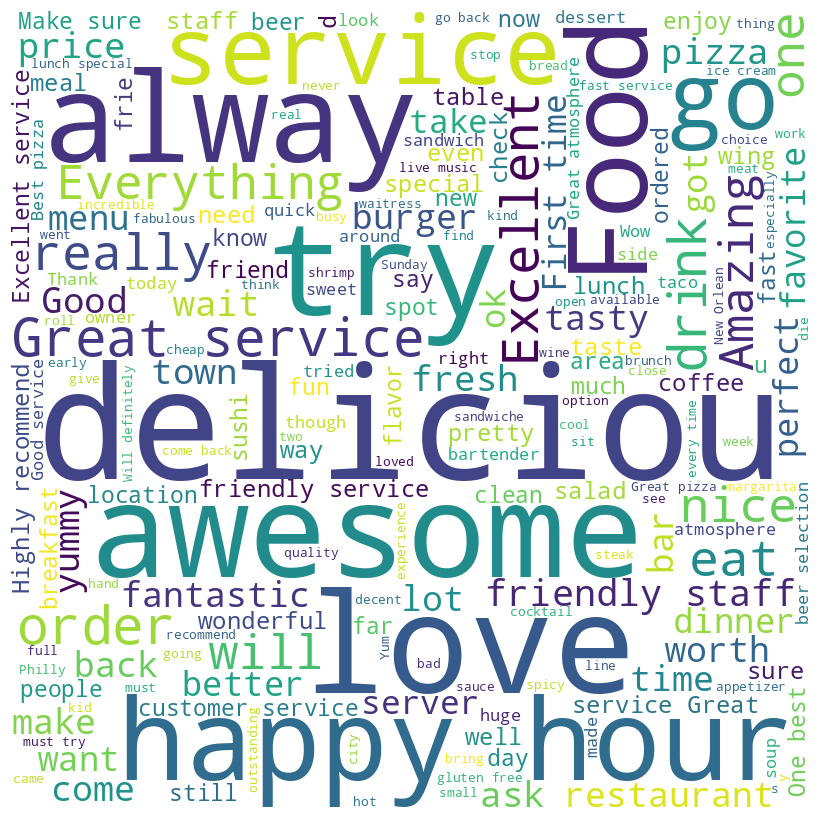

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the text in the comment column into a string
text = ' '.join(df1['text'])
stopwords = {'good', 'great','Great food','Good food','of the','on the','and the','place','the best','Love','food','amazing'}
for stopword in stopwords:
    text = text.replace(stopword, '')
# Generate a word cloud map
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',

                min_font_size = 10).generate(text)

# Show the word cloud map
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## 4.2 Selected bad reviews for word cloud analysis

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE Polarity < 0
"""

query_job = bigquery_client.query(query)
results = query_job.result()

df2 = query_job.to_dataframe()
df2

,user_id,business_id,text,date,compliment_count,Polarity,Subjectivity,Sentiment
0,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38+00:00,0,-0.191667,0.908333,Negative
1,JSzIwMqdSI74_ztnbWzsEA,xODBZmX4EmlVvbqtKN7YKg,Can always count on taco day if nothing else a...,2013-05-17 01:30:38+00:00,0,-0.390625,0.687500,Negative
2,LJ4nZDrT5w4VDV8JhtqALw,MDr7KLYSPkEonvGojNEMBw,Like the set-up...nice little hangout spot. Ci...,2013-05-18 19:06:56+00:00,0,-0.093750,0.250000,Negative
3,yyxEa8y4HGij_m7g1wDKWg,MDr7KLYSPkEonvGojNEMBw,"On Rays game day they have a ""Special Events M...",2015-04-19 21:28:49+00:00,0,-0.021429,0.485714,Negative
4,6jjHo9Lilv3kTy87pm2ycw,MDr7KLYSPkEonvGojNEMBw,"Until further notice-- wine, liquor, beer & li...",2020-03-20 10:27:22+00:00,0,-0.023810,0.547619,Negative
...,...,...,...,...,...,...,...,...
149267,gJmI5e-q82gqHq3r_sCN0g,zqEmarWiEUQ5jl9R4t8CnQ,The Cuban food restaurant is bland. Step it up...,2017-08-29 21:47:56+00:00,0,-0.208333,0.833333,Negative
149268,X0EXWAZhImMwwM4FrIUxxw,yYwZWTgSoweD0YNh2p9QRw,Typical diner. Can't beat it for the money but...,2013-08-20 21:24:06+00:00,0,-0.208333,0.450000,Negative
149269,CkmDVX10k-ZqhJt50uzLSg,-TvJ8KJdXus3_o6uvG2GHQ,"Small space, typical fare. Off Canal and Royal.",2010-06-12 19:10:00+00:00,0,-0.208333,0.450000,Negative
149270,X0EXWAZhImMwwM4FrIUxxw,yYwZWTgSoweD0YNh2p9QRw,Typical diner. Can't beat it for the money but...,2013-08-20 21:24:06+00:00,0,-0.208333,0.450000,Negative


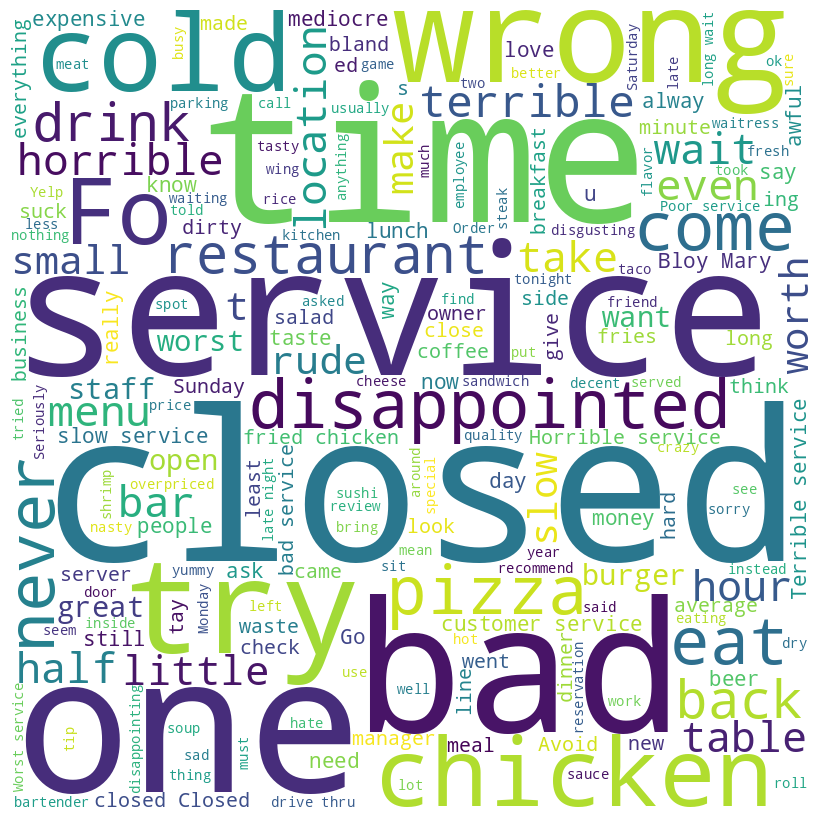

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the text in the comment column into a string
text = ' '.join(df2['text'])
stopwords = {'food', 'order', 'go','place','in the','if you','od','will'}
for stopword in stopwords:
    text = text.replace(stopword, '')
# Generate a word cloud map
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',

                min_font_size = 10).generate(text)

# Show the word cloud map
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()